# Load MNIST dataset

In [ ]:
from sklearn import datasets
import pandas as pd 
import numpy as np
import seaborn as sns 
import scipy.stats as stats
import matplotlib.pyplot as plt

In [3]:
df = datasets.load_digits()
x = df.data
y = df.target

In [3]:
df


{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [7]:
print(f"Number of samples: {len(x)}")
print(f"Number of features: {x.shape[1]}")
print(f"Number of classes: {len(np.unique(y))}")

Number of samples: 1797
Number of features: 64
Number of classes: 10


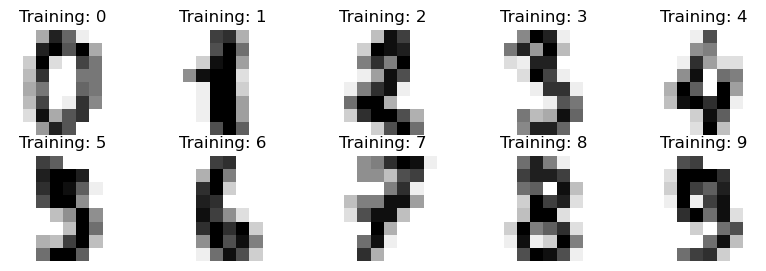

In [8]:
fig, axes = plt.subplots(2, 5, figsize=(10, 3)) 

axes = axes.flatten()

for i in range(10):
    ax = axes[i]
    image = df.images[i]
    label = df.target[i]

    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

plt.show()

# Data Preprocessing

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [5]:
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

x_train shape: (1437, 64), y_train shape: (1437,)
x_test shape: (360, 64), y_test shape: (360,)


# CLASSIFICATION BASED MODELS

# Random Forest 

In [6]:
from sklearn.model_selection import cross_val_score


In [7]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x,y)
scores = cross_val_score(rf, x, y, cv=3,scoring='accuracy')
print("Accuracy:"+ str(scores.mean())) 

Accuracy:0.9398998330550917


# SVM

In [14]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(x,y)
scores = cross_val_score(clf, x, y, cv=3,scoring='accuracy')
print("Accuracy:"+ str(scores.mean()))

Accuracy:0.9699499165275459


# KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x,y)
scores = cross_val_score(knn, x, y, cv=3,scoring='accuracy')
print("Accuracy:"+ str(scores.mean()))

Accuracy:0.9627156371730662


# Naive Bayes 

In [16]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x,y)
scores = cross_val_score(nb, x, y, cv=3,scoring='accuracy')
print("Accuracy:"+ str(scores.mean()))

Accuracy:0.8135781858653311


# Decison Tree 

In [17]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x,y)
scores = cross_val_score(dt, x, y, cv=3,scoring='accuracy')
print("Accuracy:"+ str(scores.mean()))

Accuracy:0.780189204229271


# Gradient Boosting 

In [18]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(objective='multi:softmax', num_class=len(set(y)))
xgb_clf.fit(x,y)
scores = cross_val_score(xgb_clf, x, y, cv=3, scoring='accuracy')
print("Accuracy:"+str(scores.mean()))

Accuracy:0.9181969949916527


In [21]:
# Before train-test split
print("Before train-test split:")
print(f"x_train shape: {x_train.shape}, y_train_one_hot shape: {y_train_one_hot.shape}")
print(f"x_test shape: {x_test.shape}, y_test_one_hot shape: {y_test_one_hot.shape}")

# Split the data into training and validation sets
x_train, x_val, y_train_one_hot, y_val_one_hot = train_test_split(
    x_train, y_train_one_hot, test_size=0.2, random_state=42
)

# Update the shapes
print("\nAfter train-test split:")
print(f"x_train shape: {x_train.shape}, y_train_one_hot shape: {y_train_one_hot.shape}")
print(f"x_val shape: {x_val.shape}, y_val_one_hot shape: {y_val_one_hot.shape}")


Before train-test split:
x_train shape: (919, 64), y_train_one_hot shape: (919, 10)
x_test shape: (360, 64), y_test_one_hot shape: (360, 10)

After train-test split:
x_train shape: (735, 64), y_train_one_hot shape: (735, 10)
x_val shape: (184, 64), y_val_one_hot shape: (184, 10)


# NEURAL NETWORK MODELS

# CNN

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Convert labels to one-hot encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_one_hot = to_categorical(y_encoded)

# Split the data into training, validation, and test sets
x_train, x_temp, y_train_one_hot, y_temp_one_hot = train_test_split(x, y_one_hot, test_size=0.3, random_state=42)
x_val, x_test, y_val_one_hot, y_test_one_hot = train_test_split(x_temp, y_temp_one_hot, test_size=0.5, random_state=42)

# Reshape the data for CNN input
x_train = x_train.reshape((-1, 8, 8, 1))
x_val = x_val.reshape((-1, 8, 8, 1))
x_test = x_test.reshape((-1, 8, 8, 1))

# Create the CNN model
model_cnn = Sequential()
model_cnn.add(Conv2D(32, (3, 3), input_shape=(8, 8, 1), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dense(10, activation='softmax'))

# Compile the model
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_cnn.fit(x_train, y_train_one_hot, epochs=10, batch_size=32, validation_data=(x_val, y_val_one_hot), verbose=2)

# Evaluate the model on the test set
test_loss, test_accuracy = model_cnn.evaluate(x_test, y_test_one_hot, verbose=2)
print(f'Test Accuracy: {test_accuracy}')


Epoch 1/10


40/40 - 2s - loss: 1.4160 - accuracy: 0.5951 - val_loss: 0.4381 - val_accuracy: 0.8815 - 2s/epoch - 53ms/step
Epoch 2/10
40/40 - 0s - loss: 0.3011 - accuracy: 0.9133 - val_loss: 0.2190 - val_accuracy: 0.9444 - 290ms/epoch - 7ms/step
Epoch 3/10
40/40 - 0s - loss: 0.1504 - accuracy: 0.9634 - val_loss: 0.1571 - val_accuracy: 0.9481 - 267ms/epoch - 7ms/step
Epoch 4/10
40/40 - 0s - loss: 0.1002 - accuracy: 0.9722 - val_loss: 0.1386 - val_accuracy: 0.9519 - 251ms/epoch - 6ms/step
Epoch 5/10
40/40 - 0s - loss: 0.0707 - accuracy: 0.9873 - val_loss: 0.0746 - val_accuracy: 0.9741 - 254ms/epoch - 6ms/step
Epoch 6/10
40/40 - 0s - loss: 0.0546 - accuracy: 0.9873 - val_loss: 0.0600 - val_accuracy: 0.9926 - 260ms/epoch - 7ms/step
Epoch 7/10
40/40 - 0s - loss: 0.0414 - accuracy: 0.9952 - val_loss: 0.0471 - val_accuracy: 0.9926 - 386ms/epoch - 10ms/step
Epoch 8/10
40/40 - 0s - loss: 0.0293 - accuracy: 0.9952 - val_loss: 0.0508 - val_accuracy: 0.9815 - 334ms/epoch - 8ms/step
Epoch 9/10
40/4

# RNN

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

# Assuming x, y are your data and labels
# Ensure that y contains class labels (0 to 9)

# Assuming x has shape (num_samples, 64)
# Assuming y is a 1D array of class labels

# Convert labels to one-hot encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_one_hot = to_categorical(y_encoded)

# Split the data into training, validation, and test sets
x_train, x_temp, y_train_one_hot, y_temp_one_hot = train_test_split(x, y_one_hot, test_size=0.3, random_state=42)
x_val, x_test, y_val_one_hot, y_test_one_hot = train_test_split(x_temp, y_temp_one_hot, test_size=0.5, random_state=42)

# Reshape the data for RNN input
x_train = x_train.reshape((-1, 8, 8))
x_val = x_val.reshape((-1, 8, 8))
x_test = x_test.reshape((-1, 8, 8))

# Create the RNN model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(32, input_shape=(8, 8), activation='relu'))
model_rnn.add(Dense(128, activation='relu'))
model_rnn.add(Dense(10, activation='softmax'))

# Compile the model
model_rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_rnn.fit(x_train, y_train_one_hot, epochs=10, batch_size=32, validation_data=(x_val, y_val_one_hot), verbose=2)

# Evaluate the model on the test set
test_loss, test_accuracy = model_rnn.evaluate(x_test, y_test_one_hot, verbose=2)
print(f'Test Accuracy: {test_accuracy}')



Epoch 1/10
40/40 - 3s - loss: 1.9629 - accuracy: 0.3405 - val_loss: 1.3988 - val_accuracy: 0.5370 - 3s/epoch - 67ms/step
Epoch 2/10
40/40 - 0s - loss: 0.9954 - accuracy: 0.6706 - val_loss: 0.7894 - val_accuracy: 0.7407 - 239ms/epoch - 6ms/step
Epoch 3/10
40/40 - 0s - loss: 0.6096 - accuracy: 0.7916 - val_loss: 0.5555 - val_accuracy: 0.8074 - 220ms/epoch - 6ms/step
Epoch 4/10
40/40 - 0s - loss: 0.3902 - accuracy: 0.8759 - val_loss: 0.3733 - val_accuracy: 0.8593 - 208ms/epoch - 5ms/step
Epoch 5/10
40/40 - 0s - loss: 0.2829 - accuracy: 0.9157 - val_loss: 0.2799 - val_accuracy: 0.9037 - 225ms/epoch - 6ms/step
Epoch 6/10
40/40 - 0s - loss: 0.2202 - accuracy: 0.9324 - val_loss: 0.2514 - val_accuracy: 0.9074 - 225ms/epoch - 6ms/step
Epoch 7/10
40/40 - 0s - loss: 0.1668 - accuracy: 0.9491 - val_loss: 0.2331 - val_accuracy: 0.9074 - 213ms/epoch - 5ms/step
Epoch 8/10
40/40 - 0s - loss: 0.1359 - accuracy: 0.9626 - val_loss: 0.1996 - val_accuracy: 0.9296 - 280ms/epoch - 7ms/step
Epoch 9/10
40/40 -

# ANN

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

# Assuming x, y are your data and labels
# Ensure that y contains class labels (0 to 9)

# Assuming x has shape (num_samples, 64)
# Assuming y is a 1D array of class labels

# Convert labels to one-hot encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_one_hot = to_categorical(y_encoded)

# Split the data into training, validation, and test sets
x_train, x_temp, y_train_one_hot, y_temp_one_hot = train_test_split(x, y_one_hot, test_size=0.3, random_state=42)
x_val, x_test, y_val_one_hot, y_test_one_hot = train_test_split(x_temp, y_temp_one_hot, test_size=0.5, random_state=42)

# Flatten the data for ANN input
x_train_flattened = x_train.reshape((x_train.shape[0], -1))
x_val_flattened = x_val.reshape((x_val.shape[0], -1))
x_test_flattened = x_test.reshape((x_test.shape[0], -1))

# Create the ANN model
model_ann = Sequential()
model_ann.add(Dense(128, activation='relu', input_shape=(x_train_flattened.shape[1],)))
model_ann.add(Dense(10, activation='softmax'))

# Compile the model
model_ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_ann.fit(x_train_flattened, y_train_one_hot, epochs=10, batch_size=32, validation_data=(x_val_flattened, y_val_one_hot), verbose=2)

# Evaluate the model on the test set
test_loss, test_accuracy = model_ann.evaluate(x_test_flattened, y_test_one_hot, verbose=2)
print(f'Test Accuracy: {test_accuracy}')


Epoch 1/10
40/40 - 1s - loss: 3.0306 - accuracy: 0.3978 - val_loss: 0.7210 - val_accuracy: 0.7667 - 1s/epoch - 30ms/step
Epoch 2/10
40/40 - 0s - loss: 0.4360 - accuracy: 0.8496 - val_loss: 0.3581 - val_accuracy: 0.8741 - 143ms/epoch - 4ms/step
Epoch 3/10
40/40 - 0s - loss: 0.2363 - accuracy: 0.9157 - val_loss: 0.2783 - val_accuracy: 0.9000 - 154ms/epoch - 4ms/step
Epoch 4/10
40/40 - 0s - loss: 0.1756 - accuracy: 0.9411 - val_loss: 0.1995 - val_accuracy: 0.9148 - 143ms/epoch - 4ms/step
Epoch 5/10
40/40 - 0s - loss: 0.1135 - accuracy: 0.9642 - val_loss: 0.1687 - val_accuracy: 0.9407 - 159ms/epoch - 4ms/step
Epoch 6/10
40/40 - 0s - loss: 0.0852 - accuracy: 0.9817 - val_loss: 0.1452 - val_accuracy: 0.9296 - 161ms/epoch - 4ms/step
Epoch 7/10
40/40 - 0s - loss: 0.0683 - accuracy: 0.9841 - val_loss: 0.1378 - val_accuracy: 0.9481 - 189ms/epoch - 5ms/step
Epoch 8/10
40/40 - 0s - loss: 0.0534 - accuracy: 0.9920 - val_loss: 0.1297 - val_accuracy: 0.9444 - 166ms/epoch - 4ms/step
Epoch 9/10
40/40 -

# HYPERPARAMETER TUNING

# HPO Algorithm 1: Grid Search

In [42]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

# Assuming you have a function to load and preprocess your data
# Load example dataset (replace this with your own data loading)
digits = datasets.load_digits()
data = digits.images.reshape((len(digits.images), 8, 8, 1))
labels = to_categorical(digits.target)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


In [27]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn import datasets
import optuna


def create_model(trial):
    model = Sequential()
    model.add(Conv2D(filters=trial.suggest_int('filters', 16, 64),
                     kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(8, 8, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(units=trial.suggest_int('dense_units', 32, 128), activation='relu'))
    model.add(Dense(units=10, activation='softmax'))  # Assuming 10 classes for digits 0-9

    model.compile(optimizer=Adam(learning_rate=trial.suggest_float('learning_rate', 1e-5, 1e-2)),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

def objective(trial):
    model = create_model(trial)

    # Train the model
    model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

    # Evaluate the model on the validation set
    val_loss, val_accuracy = model.evaluate(x_test, y_test, verbose=0)

    return val_loss

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

print(f'Number of finished trials: {len(study.trials)}')
print('Best trial:')
trial = study.best_trial

print(f'Value: {trial.value}')
print('Params: ')
for key, value in trial.params.items():
    print(f'    {key}: {value}')

# Train the final model using the best hyperparameters
best_model = create_model(trial)
best_model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the final model on the test set
test_loss, test_accuracy = best_model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


[I 2024-03-07 11:20:27,378] A new study created in memory with name: no-name-db3cf095-fe5d-4dce-bca9-6c71f06e48ae
[I 2024-03-07 11:20:31,861] Trial 0 finished with value: 0.04216071963310242 and parameters: {'filters': 54, 'dense_units': 69, 'learning_rate': 0.0037809239774234246}. Best is trial 0 with value: 0.04216071963310242.
[I 2024-03-07 11:20:36,386] Trial 1 finished with value: 0.11303073912858963 and parameters: {'filters': 46, 'dense_units': 39, 'learning_rate': 0.0005185556994487025}. Best is trial 0 with value: 0.04216071963310242.
[I 2024-03-07 11:20:40,662] Trial 2 finished with value: 0.12363671511411667 and parameters: {'filters': 16, 'dense_units': 38, 'learning_rate': 0.0026971591791559463}. Best is trial 0 with value: 0.04216071963310242.
[I 2024-03-07 11:20:46,281] Trial 3 finished with value: 0.06478071957826614 and parameters: {'filters': 51, 'dense_units': 52, 'learning_rate': 0.0035784941042682054}. Best is trial 0 with value: 0.04216071963310242.
[I 2024-03-07 

Number of finished trials: 10
Best trial:
Value: 0.036547135561704636
Params: 
    filters: 40
    dense_units: 75
    learning_rate: 0.0022061390175394423
Epoch 1/10
45/45 [==============================] - 1s 5ms/step - loss: 1.3470 - accuracy: 0.6465
Epoch 2/10
45/45 [==============================] - 0s 5ms/step - loss: 0.2278 - accuracy: 0.9374
Epoch 3/10
45/45 [==============================] - 0s 4ms/step - loss: 0.1218 - accuracy: 0.9694
Epoch 4/10
45/45 [==============================] - 0s 4ms/step - loss: 0.0861 - accuracy: 0.9736
Epoch 5/10
45/45 [==============================] - 0s 4ms/step - loss: 0.0532 - accuracy: 0.9847
Epoch 6/10
45/45 [==============================] - 0s 4ms/step - loss: 0.0577 - accuracy: 0.9847
Epoch 7/10
45/45 [==============================] - 0s 4ms/step - loss: 0.0418 - accuracy: 0.9861
Epoch 8/10
45/45 [==============================] - 0s 5ms/step - loss: 0.0240 - accuracy: 0.9951
Epoch 9/10
45/45 [==============================] - 0s 5ms/s

# HPO Algorithm 2: Random Search

In [28]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn import datasets
import optuna

def create_model(trial):
    model = Sequential()
    model.add(Conv2D(filters=trial.suggest_int('filters', 16, 64),
                     kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(8, 8, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(units=trial.suggest_int('dense_units', 32, 128), activation='relu'))
    model.add(Dense(units=10, activation='softmax'))  # Assuming 10 classes for digits 0-9

    model.compile(optimizer=Adam(learning_rate=trial.suggest_float('learning_rate', 1e-5, 1e-2)),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

def objective(trial):
    model = create_model(trial)

    # Train the model
    model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

    # Evaluate the model on the validation set
    val_loss, val_accuracy = model.evaluate(x_test, y_test, verbose=0)

    return val_loss

sampler = optuna.samplers.TPESampler(seed=42)  # Use TPESampler for random search
study = optuna.create_study(direction='minimize', sampler=sampler)
study.optimize(objective, n_trials=10)

print(f'Number of finished trials: {len(study.trials)}')
print('Best trial:')
trial = study.best_trial

print(f'Value: {trial.value}')
print('Params: ')
for key, value in trial.params.items():
    print(f'    {key}: {value}')

# Train the final model using the best hyperparameters
best_model = create_model(trial)
best_model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the final model on the test set
test_loss, test_accuracy = best_model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


[I 2024-03-07 11:24:23,935] A new study created in memory with name: no-name-4a63451b-9196-4cae-aef7-95644fdc469a
[I 2024-03-07 11:24:28,255] Trial 0 finished with value: 0.09060259163379669 and parameters: {'filters': 34, 'dense_units': 124, 'learning_rate': 0.007322619478695937}. Best is trial 0 with value: 0.09060259163379669.
[I 2024-03-07 11:24:32,667] Trial 1 finished with value: 0.07069774717092514 and parameters: {'filters': 45, 'dense_units': 47, 'learning_rate': 0.0015683852581586646}. Best is trial 1 with value: 0.07069774717092514.
[I 2024-03-07 11:24:36,994] Trial 2 finished with value: 0.030028099194169044 and parameters: {'filters': 18, 'dense_units': 116, 'learning_rate': 0.006015138967314656}. Best is trial 2 with value: 0.030028099194169044.
[I 2024-03-07 11:24:41,372] Trial 3 finished with value: 0.06903693079948425 and parameters: {'filters': 50, 'dense_units': 33, 'learning_rate': 0.009699399423098323}. Best is trial 2 with value: 0.030028099194169044.
[I 2024-03-0

Number of finished trials: 10
Best trial:
Value: 0.030028099194169044
Params: 
    filters: 18
    dense_units: 116
    learning_rate: 0.006015138967314656
Epoch 1/10
45/45 [==============================] - 1s 7ms/step - loss: 0.8231 - accuracy: 0.7662
Epoch 2/10
45/45 [==============================] - 0s 5ms/step - loss: 0.1257 - accuracy: 0.9569
Epoch 3/10
45/45 [==============================] - 0s 4ms/step - loss: 0.0555 - accuracy: 0.9819
Epoch 4/10
45/45 [==============================] - 0s 4ms/step - loss: 0.0398 - accuracy: 0.9896
Epoch 5/10
45/45 [==============================] - 0s 4ms/step - loss: 0.0381 - accuracy: 0.9910
Epoch 6/10
45/45 [==============================] - 0s 4ms/step - loss: 0.0194 - accuracy: 0.9937
Epoch 7/10
45/45 [==============================] - 0s 6ms/step - loss: 0.0145 - accuracy: 0.9930
Epoch 8/10
45/45 [==============================] - 0s 6ms/step - loss: 0.0103 - accuracy: 0.9972
Epoch 9/10
45/45 [==============================] - 0s 7ms/s

# HPO Algorithm 4: Bayesian Optimization 

In [52]:
import random
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras import layers, models
import numpy as np


# Assuming x and y are NumPy arrays
x = x.reshape(-1, 8, 8, 1)  # Reshape to (num_samples, 8, 8, 1)

# Define the CNN model
def create_model(trial):
    model = models.Sequential()
    
    # Choose an optimal number of filters and filter size
    num_filters = trial.suggest_int('num_filters', 8, 64, log=True)
    filter_size = trial.suggest_int('filter_size', 3, 5)
    
    model.add(layers.Conv2D(num_filters, (filter_size, filter_size), activation='relu', input_shape=(8, 8, 1), padding='same'))
    
    # Add more convolutional layers
    for i in range(trial.suggest_int('num_conv_layers', 1, 3)):
        model.add(layers.Conv2D(num_filters, (filter_size, filter_size), activation='relu', input_shape=(8, 8, 1), padding='same'))
        # Check the dimensions before applying max pooling
        if model.output_shape[1] >= 2 and model.output_shape[2] >= 2:
            model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(10, activation='softmax'))
    
    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# Train and evaluate the model with the given hyperparameters
def train_and_evaluate(model, x_train, y_train, x_val, y_val):
    model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), batch_size=32, verbose=0)
    accuracy = model.evaluate(x_val, y_val, verbose=0)[1]
    return accuracy

# Objective function for Optuna
def objective(trial, x_train, y_train, x_val, y_val):
    model = create_model(trial)
    accuracy = train_and_evaluate(model, x_train, y_train, x_val, y_val)
    return accuracy

# Split your data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

# Create study object and optimize
study = optuna.create_study(direction='maximize')
study.optimize(lambda trial: objective(trial, x_train, y_train, x_val, y_val), n_trials=20)

# Get the best parameters and results
best_params = study.best_params
best_accuracy = study.best_value

# Print the results
print(f"Best parameters: {best_params}")
print(f"Best accuracy: {best_accuracy * 100:.2f}%")


[I 2024-03-07 12:07:39,653] A new study created in memory with name: no-name-b0a59357-d71d-4d56-9c35-310c22885a6e
[I 2024-03-07 12:07:44,764] Trial 0 finished with value: 0.9777777791023254 and parameters: {'num_filters': 10, 'filter_size': 4, 'num_conv_layers': 1}. Best is trial 0 with value: 0.9777777791023254.
[I 2024-03-07 12:07:50,358] Trial 1 finished with value: 0.9472222328186035 and parameters: {'num_filters': 8, 'filter_size': 3, 'num_conv_layers': 2}. Best is trial 0 with value: 0.9777777791023254.
[I 2024-03-07 12:07:55,811] Trial 2 finished with value: 0.980555534362793 and parameters: {'num_filters': 11, 'filter_size': 3, 'num_conv_layers': 1}. Best is trial 2 with value: 0.980555534362793.
[I 2024-03-07 12:08:03,954] Trial 3 finished with value: 0.9861111044883728 and parameters: {'num_filters': 13, 'filter_size': 5, 'num_conv_layers': 2}. Best is trial 3 with value: 0.9861111044883728.
[I 2024-03-07 12:08:11,558] Trial 4 finished with value: 0.9861111044883728 and param

Best parameters: {'num_filters': 64, 'filter_size': 4, 'num_conv_layers': 3}
Best accuracy: 99.72%
